### Adaptar o csv para RAGAS (Retrieval Augmented Generation Assessment)

In [8]:
import csv
import json
import re

dados_ragas = []
pred_tools = []

def limpar_think_tags(texto):
    return re.sub(r"<think>.*?</think>", "", texto, flags=re.DOTALL).strip()


with open("C:\\Users\\ASUS\\Documents\\GitHub\\DPE_2425\\registo_interacoes.csv", encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        data_hora, pergunta, conteudo, resposta, funcao = row
        resposta = limpar_think_tags(resposta)
        print(f"Data/Hora: {data_hora}")
        print(f"Pergunta: {pergunta}")
        print(f"Função: {funcao}")
        print(f"Conteúdo: {conteudo}")
        print(f"Resposta: {resposta}")
        print("-" * 40)
        dados_ragas.append({
            "question": pergunta,
            "contexts": [conteudo],  # ou split se forem múltiplos blocos
            "answer": resposta
        })

        pred_tools.append(funcao)

with open("avaliacao_ragas.json", "w", encoding="utf-8") as f:
    json.dump(dados_ragas, f, indent=2, ensure_ascii=False)


Data/Hora: 2025-05-22T12:16:07.758978
Pergunta: De acordo com o manual, quais condições devem ser atendidas para que a porta da frente da máquina VL4 possa ser aberta durante a operação?
Função: get_similarity_context
Conteúdo: Não foram encontrados conteúdos relevantes para esta máquina e modelo.
Resposta: Lamento, mas não foi possível encontrar informações relevantes sobre as condições para a abertura da porta durante a operação para a máquina VL4 no respectivo manual. Sugiro que consultes o próprio manual da máquina para obteres instruções detalhadas e precisas de operação. Infelizmente, não tenho atualmente um link disponível para partilhar.
----------------------------------------
Data/Hora: 2025-05-22T12:16:23.834419
Pergunta: O que representa o parâmetro 1240 no processo de efetuar origem nos transportadores, na máquina EMAG VL4?
Função: get_similarity_context
Conteúdo: Contexto relevante encontrado para EMAG VL4:
- Mobil  MOBIL Hyd raulic Oil HLPD 46  MOBIL Hydraulic Oil HLPD 3

In [9]:
import re

ficheiro = "C:\\Users\\ASUS\\Desktop\\utilizador\\Desktop\\Universidade\\5º ano\\2ºSemestre\\Eval_Questions.txt"


lista_questoes = []
lista_respostas = []

with open(ficheiro, "r", encoding="utf-8") as f:
    linhas = f.readlines()

i = 0
while i < len(linhas):
    linha = linhas[i].strip()

    if linha.startswith("Q:"):
        questao = linha[2:].strip()
        questao = re.sub(r'\?\s*\[.*?\]', '?', questao)
        lista_questoes.append(questao)
        i += 1

    elif linha.startswith("R:"):
        resposta = linha[2:].strip()
        i += 1

        while i < len(linhas):
            prox = linhas[i].strip()
            if prox.startswith("Q:") or prox.startswith("R:"):
                break
            # Ignorar linhas com dois ou mais hífens consecutivos
            if "--" in prox:
                i += 1
                continue
            resposta += " " + prox
            i += 1

        resposta = re.sub(r'\?\s*\[.*?\]', '?', resposta).strip()
        lista_respostas.append(resposta)

    else:
        i += 1

# Exemplo de visualização
for q, a in zip(lista_questoes, lista_respostas):
    print("Pergunta:", q)
    print("Resposta:", a)
    print("-" * 80)



Pergunta: De acordo com o manual, quais condições devem ser atendidas para que a porta da frente da máquina VL4 possa ser aberta durante a operação?
Resposta: A informação que você procura está disponível na página 16 do manual da máquina VL4. De acordo com o manual, a porta da frente pode ser aberta durante a operação somente nas seguintes condições:  A máquina ferramenta deve ter sido referenciada e o teste de segurança deve ter sido concluído com êxito.  A tecla de Desligar máquina ferramenta deve ter sido pressionada.  A tecla de PARADA DE EMERGÊNCIA deve ter sido pressionada.  Caso haja uma mensagem ao operador referente a um erro do fuso, a porta da frente pode ser aberta apenas após um período de tempo predeterminado, por motivos de segurança.  Além disso, os interruptores fim-de-curso protegem a porta da frente, garantindo que o fuso principal não funcione com a porta aberta, permitindo apenas o movimento dos eixos com velocidade reduzida e a articulação do porta-ferramentas du

In [10]:
import json

# Ficheiros de origem e destino
ficheiro_entrada = "avaliacao_ragas.json"
ficheiro_saida = "avaliacao_ragas_com_referencia.json"

# Carregar os dados existentes
with open(ficheiro_entrada, "r", encoding="utf-8") as f:
    dados = json.load(f)

novos_dados = []

print("=== INÍCIO DA ANOTAÇÃO MANUAL ===\n")

for i, entrada in enumerate(dados):
    print(f"\n🔹 {i+1}/{len(dados)}")
    print(f"❓ Pergunta: {entrada['question']}")
    print(f"📚 Contexto extraído:\n{entrada['contexts'][0]}")
    print(f"🤖 Resposta gerada:\n{entrada['answer']}\n")

    referencia = lista_respostas[i]
    if not referencia:
        referencia = entrada["answer"]

    entrada["reference"] = referencia
    novos_dados.append(entrada)

    print("✅ Guardado.\n" + "-"*60)

# Guardar novo ficheiro com 'reference'
with open(ficheiro_saida, "w", encoding="utf-8") as f:
    json.dump(novos_dados, f, indent=2, ensure_ascii=False)

print(f"\n🎉 Anotação concluída. Ficheiro guardado como '{ficheiro_saida}'")


=== INÍCIO DA ANOTAÇÃO MANUAL ===


🔹 1/25
❓ Pergunta: De acordo com o manual, quais condições devem ser atendidas para que a porta da frente da máquina VL4 possa ser aberta durante a operação?
📚 Contexto extraído:
Não foram encontrados conteúdos relevantes para esta máquina e modelo.
🤖 Resposta gerada:
Lamento, mas não foi possível encontrar informações relevantes sobre as condições para a abertura da porta durante a operação para a máquina VL4 no respectivo manual. Sugiro que consultes o próprio manual da máquina para obteres instruções detalhadas e precisas de operação. Infelizmente, não tenho atualmente um link disponível para partilhar.

✅ Guardado.
------------------------------------------------------------

🔹 2/25
❓ Pergunta: O que representa o parâmetro 1240 no processo de efetuar origem nos transportadores, na máquina EMAG VL4?
📚 Contexto extraído:
Contexto relevante encontrado para EMAG VL4:
- Mobil  MOBIL Hyd raulic Oil HLPD 46  MOBIL Hydraulic Oil HLPD 32 TOTAL  Azolla DZF

In [20]:
import json

# Ficheiros de origem e destino
ficheiro_entrada = "avaliacao_ragas.json"
ficheiro_saida = "avaliacao_ragas_com_tools.json"

# Carregar os dados existentes
with open(ficheiro_entrada, "r", encoding="utf-8") as f:
    dados = json.load(f)

novos_dados = []

print("=== INÍCIO DA ANOTAÇÃO MANUAL ===\n")

for i, entrada in enumerate(dados):
    print(f"\n🔹 {i+1}/{len(dados)}")
    print(f"❓ Pergunta: {entrada['question']}")
    tool = str()
    if i<15:
        tool = "get_similarity_context"
    elif 15<=i<17:
        tool = "get_ots_info"
    elif 17<=i<20:
        tool = "get_ots_info_by_intervencao"
    else:
        tool = "get_fos_info"
    #tool = input("✍️ Introduz a resposta correta esperada (ENTER para usar a gerada): ").strip()
    if not tool:
        tool = entrada["tool_real"]

    entrada["tool_real"] = tool
    entrada["tool_pred"] = pred_tools[i]
    novos_dados.append(entrada)


    print("✅ Guardado.\n" + "-"*60)

# Guardar novo ficheiro com 'reference'
with open(ficheiro_saida, "w", encoding="utf-8") as f:
    json.dump(novos_dados, f, indent=2, ensure_ascii=False)

print(f"\n🎉 Anotação concluída. Ficheiro guardado como '{ficheiro_saida}'")


=== INÍCIO DA ANOTAÇÃO MANUAL ===


🔹 1/25
❓ Pergunta: De acordo com o manual, quais condições devem ser atendidas para que a porta da frente da máquina VL4 possa ser aberta durante a operação?
✅ Guardado.
------------------------------------------------------------

🔹 2/25
❓ Pergunta: O que representa o parâmetro 1240 no processo de efetuar origem nos transportadores, na máquina EMAG VL4?
✅ Guardado.
------------------------------------------------------------

🔹 3/25
❓ Pergunta: Quais são os passos iniciais para efetuar a origem no transportador relativo à máquina EMAG VL4?
✅ Guardado.
------------------------------------------------------------

🔹 4/25
❓ Pergunta: Qual é o intervalo de tempo recomendado para substituir o vidro de segurança da máquina EMAG VL4, e qual é o risco de não cumprir essa recomendação?
✅ Guardado.
------------------------------------------------------------

🔹 5/25
❓ Pergunta: O que deve ser feito antes de iniciar trabalhos no sistema hidráulico para evitar 

### Avaliação RAGAS -> Integrada com a OpenAI como defeito para efetuar a avaliação

In [ ]:
import os
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
print(f"API Key: {api_key}")    
#client = OpenAI(base_url="https://api.openai.com/v1", api_key=api_key)

In [6]:
import openai
import os

openai.api_key = os.getenv("OPENAI_API_KEY")

messages = [
        {
            "role": "system",
            "content": "Você é um assistente útil."
        },
        {
            "role": "user",
            "content": f"Quem foi o primeiro presidente dos Estados Unidos?"
        }
    ]

response = openai.chat.completions.create(
    model="gpt-4", 
    messages=messages,
    max_tokens=50,
    stream=False
)
print(response.choices[0].message.content)



O primeiro presidente dos Estados Unidos foi George Washington, que serviu de 1789 a 1797.


In [ ]:
from datasets import Dataset
from ragas.metrics import faithfulness, answer_correctness

from ragas import evaluate

# Carrega os dados convertidos
import json


with open("avaliacao_ragas_com_referencia.json", encoding="utf-8") as f:
    data = json.load(f)

dataset = Dataset.from_list(data)

# Avaliar
scores = evaluate(
    dataset,
    metrics=[
        faithfulness,
        answer_correctness,
    ]
)

print(scores.to_pandas())


Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

                                           user_input  \
0   De acordo com o manual, quais condições devem ...   
1   O que representa o parâmetro 1240 no processo ...   
2   Quais são os passos iniciais para efetuar a or...   
3   Qual é o intervalo de tempo recomendado para s...   
4   O que deve ser feito antes de iniciar trabalho...   
5   Quais são os principais itens necessários para...   
6   Como deve ser feita a instalação da unidade de...   
7   Quais são os passos necessários para ajustar a...   
8   Quais são os principais riscos envolvidos no a...   
9   Quais são os passos para ajustar a tensão da c...   
10  Em quais condições o procedimento ajuste da co...   
11  Como o sistema de pressostatos do sistema hidr...   
12  Qual o procedimento detalhado para a substitui...   
13  Quais são as etapas para verificar se o materi...   
14  Que medidas devem ser tomadas para garantir a ...   
15        Qual a OT mais recente da máquina EMAG VL4?   
16      Qual a OT mais recente 

In [25]:
df = scores.to_pandas()

In [26]:
df

,user_input,retrieved_contexts,response,reference,faithfulness,answer_correctness
0,"De acordo com o manual, quais condições devem ...",[Contexto relevante encontrado para EMAG VL4:\...,Resposta:\n\nPara abrir a porta da frente da m...,A informação que você procura está disponível ...,0.750000,0.231379
1,O que representa o parâmetro 1240 no processo ...,[Contexto relevante encontrado para EMAG VL4:\...,Parece que a pergunta está relacionada à manut...,O parâmetro 1240 no processo de efetuar origem...,0.866667,0.203000
2,Quais são os passos iniciais para efetuar a or...,[Manuais da máquina 'EMAG':\n- Manual de Proce...,Pergunta: Quais são os passos iniciais para ef...,"De acordo com o manual ""Efectuar origem nos tr...",0.428571,0.228742
3,Qual é o intervalo de tempo recomendado para s...,[Contexto relevante encontrado para EMAG VL4:\...,Com base nas informações encontradas pela funç...,"De acordo com o manual, o intervalo de tempo r...",0.500000,0.705846
4,O que deve ser feito antes de iniciar trabalho...,[Contexto relevante encontrado para EMAG VL4:\...,Segue a resposta com base na informação da fun...,"De acordo com o manual ""Manutenção e Conservaç...",0.500000,0.328347
5,Quais são os principais itens necessários para...,[Não foram encontrados conteúdos relevantes pa...,"Desculpe, não consegui encontrar informações r...","De acordo com o manual ""Procedimento de lubrif...",0.428571,0.554933
6,Como deve ser feita a instalação da unidade de...,[📘 **FOS: FOS DESBLOQUEIO EMAG_62019416.pdf**\...,**Ficha de Operação Standard: Torno EMAG VL4**...,"De acordo com o manual ""Procedimento de lubrif...",0.888889,0.209053
7,Quais são os passos necessários para ajustar a...,[Não foram encontrados conteúdos relevantes pa...,Para ajustar a tensão da corrente de pinos oco...,Quais são os passos necessários para ajustar a...,0.090909,0.235451
8,Quais são os principais riscos envolvidos no a...,[Contexto relevante encontrado para EMAG VL8-Y...,Resposta:\n\nA segurança é uma preocupação fun...,Quais são os principais riscos envolvidos no a...,0.421053,0.279690
9,Quais são os passos para ajustar a tensão da c...,[Contexto relevante encontrado para EMAG VL8-Y...,"{""text"": ""Para ajustar a tens\u00e3o da correi...","De acordo com o manual ""Procedimento ajuste da...",0.777778,0.233335


# Llama Evaluation

In [7]:
from datasets import Dataset
from ragas import evaluate

# Carrega os dados convertidos
import json

with open("llama_eval\\avaliacao_ragas_com_referencia.json", encoding="utf-8") as f:
    data = json.load(f)

dataset = Dataset.from_list(data)

# Avaliar
scores = evaluate(
    dataset,
)
df = scores.to_pandas()

Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

In [28]:
df

,user_input,retrieved_contexts,response,reference,answer_relevancy,context_precision,faithfulness,context_recall
0,"De acordo com o manual, quais condições devem ...",[Contexto relevante encontrado para EMAG VL4:\...,Resposta:\n\nPara abrir a porta da frente da m...,A informação que você procura está disponível ...,0.910287,1.0,0.750000,0.000000
1,O que representa o parâmetro 1240 no processo ...,[Contexto relevante encontrado para EMAG VL4:\...,Parece que a pergunta está relacionada à manut...,O parâmetro 1240 no processo de efetuar origem...,0.835916,0.0,0.866667,0.000000
2,Quais são os passos iniciais para efetuar a or...,[Manuais da máquina 'EMAG':\n- Manual de Proce...,Pergunta: Quais são os passos iniciais para ef...,"De acordo com o manual ""Efectuar origem nos tr...",0.950951,1.0,0.375000,0.166667
3,Qual é o intervalo de tempo recomendado para s...,[Contexto relevante encontrado para EMAG VL4:\...,Com base nas informações encontradas pela funç...,"De acordo com o manual, o intervalo de tempo r...",0.968817,1.0,0.666667,0.500000
4,O que deve ser feito antes de iniciar trabalho...,[Contexto relevante encontrado para EMAG VL4:\...,Segue a resposta com base na informação da fun...,"De acordo com o manual ""Manutenção e Conservaç...",0.956806,1.0,0.500000,0.000000
5,Quais são os principais itens necessários para...,[Não foram encontrados conteúdos relevantes pa...,"Desculpe, não consegui encontrar informações r...","De acordo com o manual ""Procedimento de lubrif...",0.000000,0.0,0.428571,0.000000
6,Como deve ser feita a instalação da unidade de...,[📘 **FOS: FOS DESBLOQUEIO EMAG_62019416.pdf**\...,**Ficha de Operação Standard: Torno EMAG VL4**...,"De acordo com o manual ""Procedimento de lubrif...",0.817970,1.0,0.944444,0.000000
7,Quais são os passos necessários para ajustar a...,[Não foram encontrados conteúdos relevantes pa...,Para ajustar a tensão da corrente de pinos oco...,Quais são os passos necessários para ajustar a...,0.989361,0.0,0.090909,0.000000
8,Quais são os principais riscos envolvidos no a...,[Contexto relevante encontrado para EMAG VL8-Y...,Resposta:\n\nA segurança é uma preocupação fun...,Quais são os principais riscos envolvidos no a...,0.891192,1.0,0.368421,0.000000
9,Quais são os passos para ajustar a tensão da c...,[Contexto relevante encontrado para EMAG VL8-Y...,"{""text"": ""Para ajustar a tens\u00e3o da correi...","De acordo com o manual ""Procedimento ajuste da...",0.976704,1.0,0.666667,0.100000


In [70]:
import numpy as np

# Calcular precisão para as colunas answer_relevancy, context_precision, context_recall
def calculate_precision_for_column(df_column):
    # Considerar como "correto" quando o valor for maior que 0.5
    y_true = np.ones(len(df_column))  # Criar um vetor de verdadeiros (1s) 
    y_pred = (df_column > 0.5).astype(int)  # Usamos o mesmo critério para predição
    correct_predictions = (y_true == y_pred).sum()
    total_predictions = len(df_column)
    return correct_predictions, total_predictions

# Calcular precisão para cada uma das colunas
precision_answer_relevancy = calculate_precision_for_column(df['answer_relevancy'])
precision_context_precision = calculate_precision_for_column(df['context_precision'])
precision_context_recall = calculate_precision_for_column(df['context_recall'])

# Preparar os resultados
results = {
    "answer_relevancy": f"Precisão para answer_relevancy: {precision_answer_relevancy[0] / precision_answer_relevancy[1]:.2f} ({precision_answer_relevancy[0]} corretas, {precision_answer_relevancy[1] - precision_answer_relevancy[0]} erradas)",
    "context_precision": f"Precisão para context_precision: {precision_context_precision[0] / precision_context_precision[1]:.2f} ({precision_context_precision[0]} corretas, {precision_context_precision[1] - precision_context_precision[0]} erradas)",
    "context_recall": f"Precisão para context_recall: {precision_context_recall[0] / precision_context_recall[1]:.2f} ({precision_context_recall[0]} corretas, {precision_context_recall[1] - precision_context_recall[0]} erradas)",
}

results


{'answer_relevancy': 'Precisão para answer_relevancy: 0.80 (20 corretas, 5 erradas)',
 'context_precision': 'Precisão para context_precision: 0.64 (16 corretas, 9 erradas)',
 'context_recall': 'Precisão para context_recall: 0.20 (5 corretas, 20 erradas)'}

In [8]:
# Calcular a precisão para as colunas de métricas (answer_relevancy, context_precision, context_recall, faithfulness) para os intervalos solicitados

# Função para calcular precisão para múltiplas colunas
def calculate_precision_for_metrics(df, columns):
    precisions = {}
    for column in columns:
        # Para cada coluna, considerar como "correto" quando o valor for maior que 0.5
        y_true = np.ones(len(df[column]))  # Criar um vetor de verdadeiros (1s)
        y_pred = (df[column] > 0.5).astype(int)  # Usamos o mesmo critério para predição
        correct_predictions = (y_true == y_pred).sum()
        total_predictions = len(df[column])
        precisions[column] = (correct_predictions, total_predictions)
    
    return precisions

# Definir as colunas de métricas que queremos analisar
metrics_columns = ['answer_relevancy', 'context_precision', 'context_recall', 'faithfulness']

# Calcular precisão para as métricas globais
global_precision = calculate_precision_for_metrics(df, metrics_columns)

# Calcular precisão para os intervalos 0:14, 15:19, 20:24
precision_0_14 = calculate_precision_for_metrics(df.iloc[0:15], metrics_columns)
precision_15_19 = calculate_precision_for_metrics(df.iloc[15:20], metrics_columns)
precision_20_24 = calculate_precision_for_metrics(df.iloc[20:25], metrics_columns)

# Preparar os resultados de precisão
results_precision = {
    "Global": {metric: f"Precisão para {metric}: {global_precision[metric][0] / global_precision[metric][1]:.2f} ({global_precision[metric][0]} corretas, {global_precision[metric][1] - global_precision[metric][0]} erradas)" for metric in metrics_columns},
    "Manuais": {metric: f"Precisão para {metric} (0:14): {precision_0_14[metric][0] / precision_0_14[metric][1]:.2f} ({precision_0_14[metric][0]} corretas, {precision_0_14[metric][1] - precision_0_14[metric][0]} erradas)" for metric in metrics_columns},
    "OTs": {metric: f"Precisão para {metric} (15:19): {precision_15_19[metric][0] / precision_15_19[metric][1]:.2f} ({precision_15_19[metric][0]} corretas, {precision_15_19[metric][1] - precision_15_19[metric][0]} erradas)" for metric in metrics_columns},
    "FOSs": {metric: f"Precisão para {metric} (20:24): {precision_20_24[metric][0] / precision_20_24[metric][1]:.2f} ({precision_20_24[metric][0]} corretas, {precision_20_24[metric][1] - precision_20_24[metric][0]} erradas)" for metric in metrics_columns},
}

results_precision


{'Global': {'answer_relevancy': 'Precisão para answer_relevancy: 0.80 (20 corretas, 5 erradas)',
  'context_precision': 'Precisão para context_precision: 0.64 (16 corretas, 9 erradas)',
  'context_recall': 'Precisão para context_recall: 0.16 (4 corretas, 21 erradas)',
  'faithfulness': 'Precisão para faithfulness: 0.56 (14 corretas, 11 erradas)'},
 'Manuais': {'answer_relevancy': 'Precisão para answer_relevancy (0:14): 0.87 (13 corretas, 2 erradas)',
  'context_precision': 'Precisão para context_precision (0:14): 0.80 (12 corretas, 3 erradas)',
  'context_recall': 'Precisão para context_recall (0:14): 0.13 (2 corretas, 13 erradas)',
  'faithfulness': 'Precisão para faithfulness (0:14): 0.60 (9 corretas, 6 erradas)'},
 'OTs': {'answer_relevancy': 'Precisão para answer_relevancy (15:19): 0.60 (3 corretas, 2 erradas)',
  'context_precision': 'Precisão para context_precision (15:19): 0.40 (2 corretas, 3 erradas)',
  'context_recall': 'Precisão para context_recall (15:19): 0.20 (1 corretas,

In [29]:
with open("eval_metrics.csv", "w", encoding="utf-8") as f:
    df.to_csv(f, index=False)

# Qwen3 Evaluation

In [ ]:
from datasets import Dataset
from ragas import evaluate
import numpy as np

# Carrega os dados convertidos
import json
import os
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

with open("qwen_eval\\avaliacao_ragas_com_referencia.json", encoding="utf-8") as f:
    data = json.load(f)

dataset = Dataset.from_list(data)

# Avaliar
scores = evaluate(
    dataset,
)
df = scores.to_pandas()

In [6]:
def calculate_precision_for_metrics(df, columns):
    precisions = {}
    for column in columns:
        # Para cada coluna, considerar como "correto" quando o valor for maior que 0.5
        y_true = np.ones(len(df[column]))  # Criar um vetor de verdadeiros (1s)
        y_pred = (df[column] > 0.5).astype(int)  # Usamos o mesmo critério para predição
        correct_predictions = (y_true == y_pred).sum()
        total_predictions = len(df[column])
        precisions[column] = (correct_predictions, total_predictions)
    
    return precisions

# Definir as colunas de métricas que queremos analisar
metrics_columns = ['answer_relevancy', 'context_precision', 'context_recall', 'faithfulness']

# Calcular precisão para as métricas globais
global_precision = calculate_precision_for_metrics(df, metrics_columns)

# Calcular precisão para os intervalos 0:14, 15:19, 20:24
precision_0_14 = calculate_precision_for_metrics(df.iloc[0:15], metrics_columns)
precision_15_19 = calculate_precision_for_metrics(df.iloc[15:20], metrics_columns)
precision_20_24 = calculate_precision_for_metrics(df.iloc[20:25], metrics_columns)

# Preparar os resultados de precisão
results_precision = {
    "Global": {metric: f"Precisão para {metric}: {global_precision[metric][0] / global_precision[metric][1]:.2f} ({global_precision[metric][0]} corretas, {global_precision[metric][1] - global_precision[metric][0]} erradas)" for metric in metrics_columns},
    "Manuais": {metric: f"Precisão para {metric} (0:14): {precision_0_14[metric][0] / precision_0_14[metric][1]:.2f} ({precision_0_14[metric][0]} corretas, {precision_0_14[metric][1] - precision_0_14[metric][0]} erradas)" for metric in metrics_columns},
    "OTs": {metric: f"Precisão para {metric} (15:19): {precision_15_19[metric][0] / precision_15_19[metric][1]:.2f} ({precision_15_19[metric][0]} corretas, {precision_15_19[metric][1] - precision_15_19[metric][0]} erradas)" for metric in metrics_columns},
    "FOSs": {metric: f"Precisão para {metric} (20:24): {precision_20_24[metric][0] / precision_20_24[metric][1]:.2f} ({precision_20_24[metric][0]} corretas, {precision_20_24[metric][1] - precision_20_24[metric][0]} erradas)" for metric in metrics_columns},
}

results_precision

{'Global': {'answer_relevancy': 'Precisão para answer_relevancy: 0.84 (21 corretas, 4 erradas)',
  'context_precision': 'Precisão para context_precision: 0.52 (13 corretas, 12 erradas)',
  'context_recall': 'Precisão para context_recall: 0.24 (6 corretas, 19 erradas)',
  'faithfulness': 'Precisão para faithfulness: 0.60 (15 corretas, 10 erradas)'},
 'Manuais': {'answer_relevancy': 'Precisão para answer_relevancy (0:14): 0.73 (11 corretas, 4 erradas)',
  'context_precision': 'Precisão para context_precision (0:14): 0.53 (8 corretas, 7 erradas)',
  'context_recall': 'Precisão para context_recall (0:14): 0.13 (2 corretas, 13 erradas)',
  'faithfulness': 'Precisão para faithfulness (0:14): 0.60 (9 corretas, 6 erradas)'},
 'OTs': {'answer_relevancy': 'Precisão para answer_relevancy (15:19): 1.00 (5 corretas, 0 erradas)',
  'context_precision': 'Precisão para context_precision (15:19): 0.40 (2 corretas, 3 erradas)',
  'context_recall': 'Precisão para context_recall (15:19): 0.40 (2 corretas,

# GPT Evaluation

In [ ]:
from datasets import Dataset
from ragas import evaluate
import numpy as np

# Carrega os dados convertidos
import json
import os
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

with open("avaliacao_ragas_com_referencia.json", encoding="utf-8") as f:
    data = json.load(f)

dataset = Dataset.from_list(data)

# Avaliar
scores = evaluate(
    dataset,
)
df = scores.to_pandas()

In [2]:
def calculate_precision_for_metrics(df, columns):
    precisions = {}
    for column in columns:
        # Para cada coluna, considerar como "correto" quando o valor for maior que 0.5
        y_true = np.ones(len(df[column]))  # Criar um vetor de verdadeiros (1s)
        y_pred = (df[column] > 0.5).astype(int)  # Usamos o mesmo critério para predição
        correct_predictions = (y_true == y_pred).sum()
        total_predictions = len(df[column])
        precisions[column] = (correct_predictions, total_predictions)
    
    return precisions

# Definir as colunas de métricas que queremos analisar
metrics_columns = ['answer_relevancy', 'context_precision', 'context_recall', 'faithfulness']

# Calcular precisão para as métricas globais
global_precision = calculate_precision_for_metrics(df, metrics_columns)

# Calcular precisão para os intervalos 0:14, 15:19, 20:24
precision_0_14 = calculate_precision_for_metrics(df.iloc[0:15], metrics_columns)
precision_15_19 = calculate_precision_for_metrics(df.iloc[15:20], metrics_columns)
precision_20_24 = calculate_precision_for_metrics(df.iloc[20:25], metrics_columns)

# Preparar os resultados de precisão
results_precision = {
    "Global": {metric: f"Precisão para {metric}: {global_precision[metric][0] / global_precision[metric][1]:.2f} ({global_precision[metric][0]} corretas, {global_precision[metric][1] - global_precision[metric][0]} erradas)" for metric in metrics_columns},
    "Manuais": {metric: f"Precisão para {metric} (0:14): {precision_0_14[metric][0] / precision_0_14[metric][1]:.2f} ({precision_0_14[metric][0]} corretas, {precision_0_14[metric][1] - precision_0_14[metric][0]} erradas)" for metric in metrics_columns},
    "OTs": {metric: f"Precisão para {metric} (15:19): {precision_15_19[metric][0] / precision_15_19[metric][1]:.2f} ({precision_15_19[metric][0]} corretas, {precision_15_19[metric][1] - precision_15_19[metric][0]} erradas)" for metric in metrics_columns},
    "FOSs": {metric: f"Precisão para {metric} (20:24): {precision_20_24[metric][0] / precision_20_24[metric][1]:.2f} ({precision_20_24[metric][0]} corretas, {precision_20_24[metric][1] - precision_20_24[metric][0]} erradas)" for metric in metrics_columns},
}


In [3]:
results_precision

{'Global': {'answer_relevancy': 'Precisão para answer_relevancy: 0.64 (16 corretas, 9 erradas)',
  'context_precision': 'Precisão para context_precision: 0.44 (11 corretas, 14 erradas)',
  'context_recall': 'Precisão para context_recall: 0.20 (5 corretas, 20 erradas)',
  'faithfulness': 'Precisão para faithfulness: 0.64 (16 corretas, 9 erradas)'},
 'Manuais': {'answer_relevancy': 'Precisão para answer_relevancy (0:14): 0.67 (10 corretas, 5 erradas)',
  'context_precision': 'Precisão para context_precision (0:14): 0.53 (8 corretas, 7 erradas)',
  'context_recall': 'Precisão para context_recall (0:14): 0.13 (2 corretas, 13 erradas)',
  'faithfulness': 'Precisão para faithfulness (0:14): 0.67 (10 corretas, 5 erradas)'},
 'OTs': {'answer_relevancy': 'Precisão para answer_relevancy (15:19): 0.60 (3 corretas, 2 erradas)',
  'context_precision': 'Precisão para context_precision (15:19): 0.40 (2 corretas, 3 erradas)',
  'context_recall': 'Precisão para context_recall (15:19): 0.40 (2 corretas,

### Alternativa será:

-Faithfullness: Crio um prompt e envio para o Llama para extrair declarações de cada frase de uma dada resposta de um par Q-A.
De seguida, o Llama irá verificar o veredicto das declarações (Sim/Não) -> admissivel

F = Veridcto(Sim)/total

-Answer Relevance: Crio um prompt para o Llama criar uma pergunta sintetica com base na resposta fornecida. De seguida, 
passo para vetor e calculo a cosine similarity com a pergunta original. Faço a média et voi la.

AR = 1/n(Sumatorio(simi(qorigi;q,syntetic)))

-Context Relevance: Crio um prompt para o Llama para extrair declarações relevnates de cada frase da resposa de um dado
para Q-A.

CR = nº frase relevantes/nº total de frases

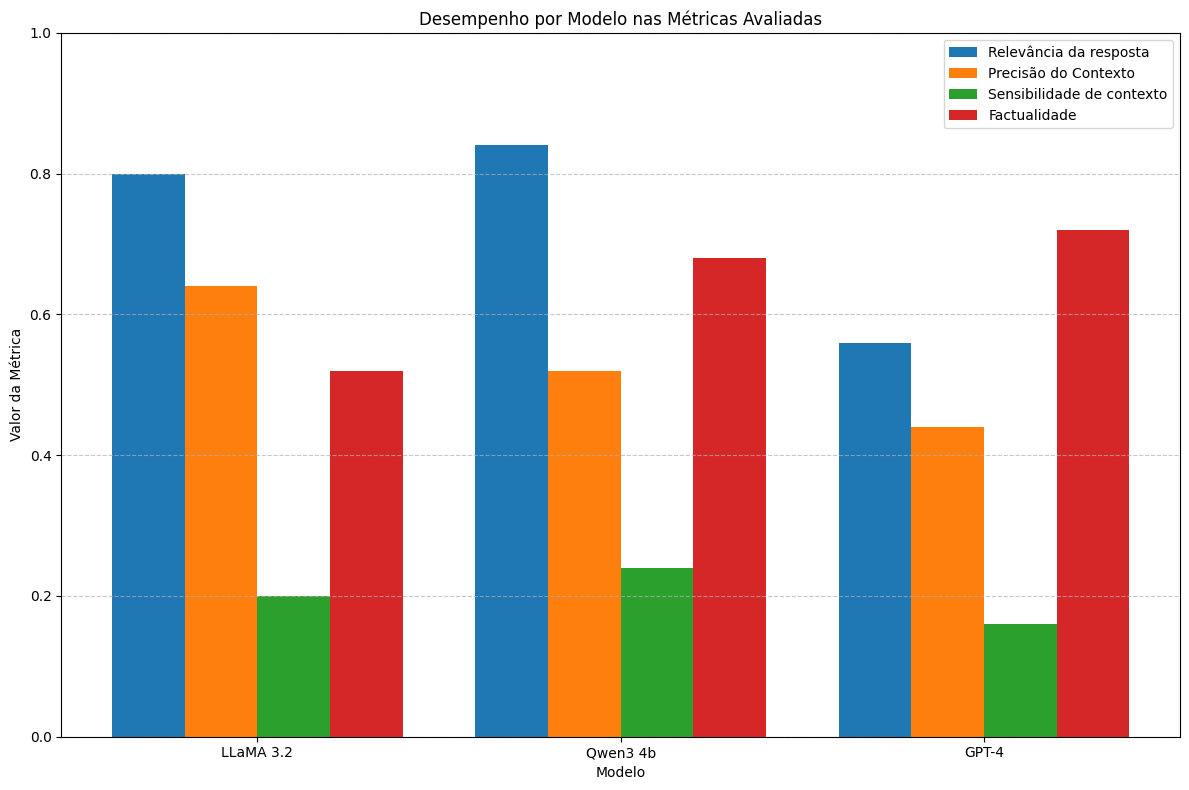

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
modelos = ['LLaMA 3.2', 'Qwen3 4b', 'GPT-4']
answer_relevancy = [0.8, 0.84, 0.56]
factualidade = [0.52, 0.68, 0.72]
context_recall = [0.20, 0.24, 0.16]
context_precision = [0.64, 0.52, 0.44]

# Agrupamento
x = np.arange(len(modelos))
largura = 0.2

# Criação do gráfico
plt.figure(figsize=(12,8))

plt.bar(x-1.5*largura, answer_relevancy, width=largura, label='Relevância da resposta')
plt.bar(x-0.5*largura , context_precision, width=largura, label='Precisão do Contexto')
plt.bar(x+ 0.5*largura, context_recall, width=largura, label='Sensibilidade de contexto')
plt.bar(x +1.5*largura, factualidade, width=largura, label='Factualidade')


# Eixos e legendas
plt.ylabel('Valor da Métrica')
plt.xlabel('Modelo')
plt.title('Desempenho por Modelo nas Métricas Avaliadas')
plt.xticks(x, modelos)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Factualidade (Faithfulness)

In [107]:
from openai import OpenAI
import os
import regex as re
import pandas as pd
import csv
import json


client_ollama = OpenAI(base_url="http://localhost:11434/v1", api_key="ollama")

llama_model = "deepseek-r1:7b"

system_prompt = """

"""


messages = [
    {
        "role": "system",
        "content": system_prompt
    },
    {
        "role": "user",
        "content": f"Pergunta: {}"
    }
]


SyntaxError: f-string: empty expression not allowed (2468090029.py, line 26)

In [3]:
import csv
from transformers import pipeline
from openai import OpenAI


# Carregar o modelo LLM (exemplo usando GPT-3 ou outro modelo)
client_ollama = OpenAI(base_url="http://localhost:11434/v1", api_key="ollama")

# Função para extrair declarações de uma resposta
def extract_statements(response, pergunta):
    llama_model = "llama3.2"
    # Dividir a resposta em frases
    sentences = response.split(".")
    system_prompt = """
    Tu és um assistente de IA que extrai declarações de cada frase presente nas respostas.
    Tu deves analisar cada frase e identificar as declarações relevantes.
    As declarações importantes são aquelas que contêm informações significativas ou relevantes para a pergunta.
    Peço que não adiciones qualquer outro texto ou explicação a não ser as declarações extraídas.
    Essas declarações são exatamente citações do texto que são mais relevantes.
    Caso não consigas identificar declarações relevantes, deves devolver exatamente como presente a seguir -> negativo
    Caso não seja fornecida qualquer resposta, deves devolver exatamente como presente a seguir -> negativo"""
    
    # Extrair declarações usando o LLM (pode ser necessário ajustar conforme o seu modelo)
    statements = []
    for sentence in sentences:
        messages = [
            {
                "role": "system",
                "content": system_prompt + f"Pergunta: {pergunta}"
            },
            {
                "role": "user",
                "content": f"Frase: {sentence}"
            }
        ]

        # 1ª chamada para verificar se é necessária função
        response = client_ollama.chat.completions.create(
            model=llama_model,
            messages=messages,
        )
        message = response.choices[0].message.content
        statements.append(message)
    return statements

def verdicto(statements, context, pergunta):
    llama_model = "llama3.2"
    system_prompt = """
    És um assistente de IA que fornece um veredicto sobre a **declaração**.
    Tu deves analisar a **declaração** individual, o **contexto**, e a **pergunta** submetida. Após essa análise rigorsa, deves determinar se a **declaração** está enquadrada com o **contexto** ou não.
    A resposta que deves devolver deve ser unicamente "Sim" ou "Não". Não adiciones qualquer outro texto ou explicação a não ser a resposta "Sim" ou "Não".
    Deves devolver "Sim" se a **declaração** estiver de acordo com o **contexto** e a **pergunta**. Caso contrário, deves devolver "Não".
    Ex: Pergunta: "Qual o tempo máximo de troca do vidro de segurança?"
    Contexto: "O vidro de segurança é um tipo de vidro que é projetado para resistir a impactos e quebras. Ele é frequentemente usado em janelas e portas de segurança. Tem uma vida útil de 10 anos."
    Declaração: "O vidro de segurança é projetado para resistir a impactos e quebras"
    Deverás devolver: "Sim"
    """
    # Extrair declarações usando o LLM (pode ser necessário ajustar conforme o seu modelo)
    veredicts = []
    for statement in statements:
        messages = [
            {
                "role": "system",
                "content": system_prompt + f"Context: {context}" + f"Pergunta: {pergunta}"
            },
            {
                "role": "user",
                "content": f"Declaração: {statement}"
            }
        ]

        # 1ª chamada para verificar se é necessária função
        response = client_ollama.chat.completions.create(
            model=llama_model,
            messages=messages,
        )
        message = response.choices[0].message.content
        veredicts.append(message)
    return veredicts

all_statements = []
all_veredicts = []
# Carregar perguntas e respostas do arquivo CSV
with open('C:\\Users\\ASUS\\Documents\\GitHub\\DPE_2425\\registo_interacoes.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        data_hora, pergunta, conteudo, resposta, funcao = row
        statements = extract_statements(resposta, pergunta)
        all_statements.append(statements)
        #veredicts = verdicto(statements, conteudo, pergunta)
        #all_veredicts.append(veredicts)
        print(f"Declarações extraídas para a pergunta {statements} \nDA RESPOSTA: {resposta}")
        #print(f"Veredito: {veredicts}")
        print("-" * 40)


Declarações extraídas para a pergunta ['- Prazo máximo para a troca do vidro da máquina EMAG VL4 não foi encontrado.', 'negativo'] 
DA RESPOSTA: Pergunta: Qual o prazo máximo para a troca do vidro da máquina EMAG VL4?

Resposta:
- Título do manual: Manutençao e conservaçao
- Resumo técnico: Não encontrado
- Link de acesso ao manual: [Não disponível, pois não é um link diretto a uma página]  

Observação: Não foi encontrada nenhuma informação específica sobre o prazo máximo para troca do vidro da máquina EMAG VL4 nos manuais mencionados.
----------------------------------------
Declarações extraídas para a pergunta ['- Após cada 8 horas de uso.', 'A danificação ou deterioração do vidro de segurança.', '- a recomendação é fazer a troca do vidro de segurança dentro de 3 meses', '- Tempo não especificado para efetuar a troca do vidro de segurança.', '- nada', '- Sem nenhuma marca ou presta', 'Negativo.', '- Realizar os ajustes necessários.', ' Negativo', '- negative', '- Documentar\n- Seja

In [2]:
all_statements

[['- Não foi encontrada nenhuma informação específica sobre o prazo máximo para troca do vidro da máquina EMAG VL4 nos manuais mencionados.',
  'Negativo'],
 ['* O estado do vidro de segurança deve ser verificar após cada 8 horas de uso.',
  'Declaração: \n- Possível danificação ou deterioração do vidro de segurança',
  'Garantair a segurança dos operadors e da máquina.',
  '• tempo máximo para efetuar a troca do vidro de segurança da máquina EMAG VL4. (negativo não foi fornecido,ém assim eu digiro -  **negaativo**)',
  '"se o vidro de segurança está danificado"',
  '* está em perfeito estado',
  '**negativo**',
  '- Realizar os ajustes necessários\n- Fazer ajustes ao vidro de segurança.',
  '- None',
  '*negativo*',
  '- É essencial',
  '- Consultar o manual operacional da máquina VL4.',
  '- "A troca do vidro de segurança pode ser feita a cada mês, sendo recomendado realizar essa tarefa no mínimo uma vez ao mês."',
  '* "pdf#page=3") - **negaativo**\n* "recomenda-se entrar em contato

In [4]:
list_statements = []

for lista in all_statements:
    for item in lista:
        list_statements.append(item)

In [ ]:
list_veridicts, list_veridicts_0, list_veridicts_1  = [], [], []
for statement in list_statements:
    print(statement)
    print(statement.lower())
    statement_ = statement.strip()
    if statement_.lower().__contains__("nega") or statement.lower() == :
        list_veridicts_0.append(int(0))
    else:
        list_veridicts_1.append(int(1))


- Prazo máximo para a troca do vidro da máquina EMAG VL4 não foi encontrado.
- prazo máximo para a troca do vidro da máquina emag vl4 não foi encontrado.
negativo
negativo
- Após cada 8 horas de uso.
- após cada 8 horas de uso.
A danificação ou deterioração do vidro de segurança.
a danificação ou deterioração do vidro de segurança.
- a recomendação é fazer a troca do vidro de segurança dentro de 3 meses
- a recomendação é fazer a troca do vidro de segurança dentro de 3 meses
- Tempo não especificado para efetuar a troca do vidro de segurança.
- tempo não especificado para efetuar a troca do vidro de segurança.
- nada
- nada
- Sem nenhuma marca ou presta
- sem nenhuma marca ou presta
Negativo.
negativo.
- Realizar os ajustes necessários.
- realizar os ajustes necessários.
 Negativo
 negativo
- negative
- negative
- Documentar
- Seja documentos 
- Armazenadas
- Futuro
- documentar
- seja documentos 
- armazenadas
- futuro
- tempo máximo não especificado
- tempo máximo não especificado
"N

In [5]:
list_statements

['- Prazo máximo para a troca do vidro da máquina EMAG VL4 não foi encontrado.',
 'negativo',
 '- Após cada 8 horas de uso.',
 'A danificação ou deterioração do vidro de segurança.',
 '- a recomendação é fazer a troca do vidro de segurança dentro de 3 meses',
 '- Tempo não especificado para efetuar a troca do vidro de segurança.',
 '- nada',
 '- Sem nenhuma marca ou presta',
 'Negativo.',
 '- Realizar os ajustes necessários.',
 ' Negativo',
 '- negative',
 '- Documentar\n- Seja documentos \n- Armazenadas\n- Futuro',
 '- tempo máximo não especificado',
 '"Nenhum" \n"Tabela 3: Detalhes da troca do vidro de segurança"',
 '- 3\n- Solicitar uma cópia atualizada',
 'Negativo',
 '- Tempos de troca do vidro de segurança',
 'Verificar o vidro de segurança regularmente.',
 '- um tempo máximo não especificado para a troca do vidro de segurança',
 '- uma troca do vidro de segurança.',
 '- Desmontagem do vidro de segurança.  \n - Realizar a troca do vidro novo.',
 '-\nnegativo\n(Parece que você ins

In [8]:
faithfulness = (len(list_veridicts_1) /(len(list_veridicts_0)+len(list_veridicts_1))) * 100

In [9]:
print(f"Taxa de factualidade: {faithfulness:.2f}%")

Taxa de factualidade: 68.00%


# Relevância da Resposta

In [74]:
with open("avaliacao_ragas.json", "r", encoding="utf-8") as f:
    data = json.load(f)
    

In [88]:
from embeddings import gerar_embedding
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def syntetic_question(resposta):
    llama_model = "llama3.2"
    # Dividir a resposta em frases
    system_prompt = """
    Tu és um assistente de IA que analisa a resposta fornecida e gera uma pergunta sintética que poderia ter sido feita para obter essa resposta.
    A pergunta gerada deve ser relevante e específica para o conteúdo da resposta.
    Cria uma única questão sintética que abranja o conteúdo da resposta.
    Não adiciones qualquer outro texto ou explicação a não ser a pergunta gerada.
    Ex: resposta "O vidro de segurança é um tipo de vidro que é projetado para resistir a impactos e quebras. Ele é frequentemente usado em janelas e portas de segurança. Tem uma vida útil de 10 anos."
    Deverás devolver: "Qual é o tempo máximo de troca do vidro de segurança?"
    """
    messages = [
        {
            "role": "system",
            "content": system_prompt
        },
        {
            "role": "user",
            "content": f"Resposta: {resposta}"
        }
    ]

    # 1ª chamada para verificar se é necessária função
    response = client_ollama.chat.completions.create(
        model=llama_model,
        messages=messages,
    )
    message = response.choices[0].message.content
    return message

def similarity(question_s, pergunta):
    emb_qs = gerar_embedding(question_s)
    emb_p = gerar_embedding(pergunta)
    emb_qs = np.array(emb_qs).reshape(1, -1)
    emb_p = np.array(emb_p).reshape(1, -1)
    score = cosine_similarity(emb_qs, emb_p)

    # Calcular a similaridade entre os embeddings

    return score

syntetic_questions = []
with open('C:\\Users\\ASUS\\Documents\\GitHub\\DPE_2425\\registo_interacoes.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        q_s = []
        data_hora, pergunta, conteudo, resposta, funcao = row
        question_s = syntetic_question(resposta)
        print(f"Pergunta sintética: {question_s}")
        print(f"Pergunta original: {pergunta}")
        q_s.append(question_s)
        q_s.append(pergunta)
        syntetic_questions.append(q_s)
        simi_score = similarity(question_s, pergunta)
        print(f"Similarity score: {simi_score}")
        print("-" * 40)
        

Pergunta sintética: Qual é o tempo máximo de troca do vidro da máquina EMAG VL4?
Pergunta original: Qual o prazo máximo para a troca do vidro da máquina EMAG VL4?
Similarity score: [[0.96451029]]
----------------------------------------
Pergunta sintética: Quando deve ser verificado o estado do vidro de segurança após o uso da máquina EMAG VL4?
Pergunta original: Qual é o tempo máximo para efetuar a troca do vidro de segurança da máquina EMAG VL4?
Similarity score: [[0.83121863]]
----------------------------------------
Pergunta sintética: Quais são os procedimentos específicos para trocar o vidro de segurança em uma máquina e garantir a sua adequação com as normas de proteção pessoal da equipagem trabalhadora?
Pergunta original: Qual o tempo máximo da troca do vidro de segurança da máquina EMAG VL4?
Similarity score: [[0.59633623]]
----------------------------------------
Pergunta sintética: Qual intervalo de tempo deve ser considerado após que a máquina EMAG VL4 deve passar para real

In [10]:
from ragas.dataset_schema import SingleTurnSample 
from ragas.metrics import FaithfulnesswithHHEM


sample = SingleTurnSample(
        user_input="When was the first super bowl?",
        response="The first superbowl was held on Jan 15, 1967",
        retrieved_contexts=[
            "The First AFL–NFL World Championship Game was an American football game played on January 15, 1967, at the Los Angeles Memorial Coliseum in Los Angeles."
        ]
    )
scorer = FaithfulnesswithHHEM(llm=client_ollama)
await scorer.single_turn_ascore(sample)

config.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

c:\Users\ASUS\miniconda3\envs\EnvEmbeddings\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ASUS\.cache\huggingface\hub\models--vectara--hallucination_evaluation_model. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


configuration_hhem_v2.py:   0%|          | 0.00/760 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/vectara/hallucination_evaluation_model:
- configuration_hhem_v2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
You are using a model of type HHEMv2Config to instantiate a model of type HHEMv2. This is not supported for all configurations of models and can yield errors.


modeling_hhem_v2.py:   0%|          | 0.00/2.68k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/vectara/hallucination_evaluation_model:
- modeling_hhem_v2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

c:\Users\ASUS\miniconda3\envs\EnvEmbeddings\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ASUS\.cache\huggingface\hub\models--google--flan-t5-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

AttributeError: 'OpenAI' object has no attribute 'generate'

In [24]:
import csv
import asyncio
from ragas import MultiTurnSample
from ragas.metrics import NonLLMContextPrecisionWithReference

# Inicialize a métrica de precisão de contexto
context_precision = NonLLMContextPrecisionWithReference()

# Função assíncrona para calcular e imprimir as pontuações
async def evaluate_precision():
    with open('C:\\Users\\ASUS\\Documents\\GitHub\\DPE_2425\\registo_interacoes.csv', mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            data_hora, pergunta, conteudo, resposta, funcao = row
            # Criar objeto SingleTurnSample
            sample = MultiTurnSample(
                ai_input=[resposta],
                reference = [conteudo],
            )

            # Calcular a pontuação usando o método assíncrono
            score = await context_precision.single_turn_ascore(sample)
            
            # Imprimir a pontuação (score) de precisão do contexto
            print(f"Data/Hora: {data_hora}, Pergunta: {pergunta}")
            print(f"Pontuação de precisão do contexto: {score}")
            print('-' * 40)

# Executar a função assíncrona usando um loop de evento
asyncio.run(evaluate_precision())


ValidationError: 2 validation errors for MultiTurnSample
user_input
  Field required [type=missing, input_value={'ai_input': ['Pergunta: ...çäo e conservação"]}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/missing
reference
  Input should be a valid string [type=string_type, input_value=["Manuais da máquina 'EM...nçäo e conservação"], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type

In [ ]:
my_device = "cuda:0"
my_batch_size = 10

scorer = FaithfulnesswithHHEM(device=my_device, batch_size=my_batch_size)
await scorer.single_turn_ascore(sample)